In [1]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the training set
dataset_train = pd.read_csv('training.csv')
training_set = dataset_train.iloc[:, 1:2].values


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1076):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [7]:

# Initialising the RNN
regressor = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [9]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1016/1016 [==============================] - 12s 11ms/step - loss: 0.0420
Epoch 2/100
1016/1016 [==============================] - 7s 7ms/step - loss: 0.0065
Epoch 3/100
1016/1016 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 4/100
1016/1016 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 5/100
1016/1016 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 6/100
1016/1016 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 7/100
1016/1016 [==============================] - 7s 7ms/step - loss: 0.0039
Epoch 8/100
1016/1016 [==============================] - 7s 7ms/step - loss: 0.0041
Epoch 9/100
1016/1016 [==============================] - 8s 7ms/step - loss: 0.0040
Epoch 10/100
1016/1016 [==============================] - 7s 7ms/step - loss: 0.0043
Epoch 11/100
1016/1016 [==============================] - 7s 7ms/step - loss: 0.0037
Epoch 12/100
1016/1016 [==============================] - 7s 7ms/step - 

1016/1016 [==============================] - 6s 6ms/step - loss: 0.0013
Epoch 98/100
1016/1016 [==============================] - 6s 6ms/step - loss: 0.0013
Epoch 99/100
1016/1016 [==============================] - 6s 6ms/step - loss: 0.0013
Epoch 100/100
1016/1016 [==============================] - 8s 8ms/step - loss: 0.0013


In [12]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2018
dataset_test = pd.read_csv('testing.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:

# Getting the predicted stock price of 2018
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 182):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

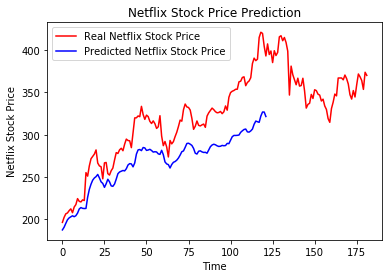

In [14]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Netflix Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()


So , it's incorrect . Will try to fix this later

Source : https://finance.yahoo.com/quote/NFLX/history?period1=1379701800&period2=1537468200&interval=1d&filter=history&frequency=1d